In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

**Reading the data**

In [20]:
df =pd.read_csv('/content/data.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df = df.dropna()
column = ['type']
df = df.drop(column, axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6463.000000,7.217755,1.297913,3.800000,6.400000,7.000000,7.700000,15.900000
volatile acidity,6463.000000,0.339589,0.164639,0.080000,0.230000,0.290000,0.400000,1.580000
citric acid,6463.000000,0.318758,0.145252,0.000000,0.250000,0.310000,0.390000,1.660000
residual sugar,6463.000000,5.443958,4.756852,0.600000,1.800000,3.000000,8.100000,65.800000
chlorides,6463.000000,0.056056,0.035076,0.009000,0.038000,0.047000,0.065000,0.611000
free sulfur dioxide,6463.000000,30.516865,17.758815,1.000000,17.000000,29.000000,41.000000,289.000000
total sulfur dioxide,6463.000000,115.694492,56.526736,6.000000,77.000000,118.000000,156.000000,440.000000
density,6463.000000,0.994698,0.003001,0.987110,0.992330,0.994890,0.997000,1.038980
pH,6463.000000,3.218332,0.160650,2.720000,3.110000,3.210000,3.320000,4.010000
sulphates,6463.000000,0.531150,0.148913,0.220000,0.430000,0.510000,0.600000,2.000000


**Correlation of dataset is given below**

<ipython-input-5-cc73820d78fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=df,palette='Greens_d')


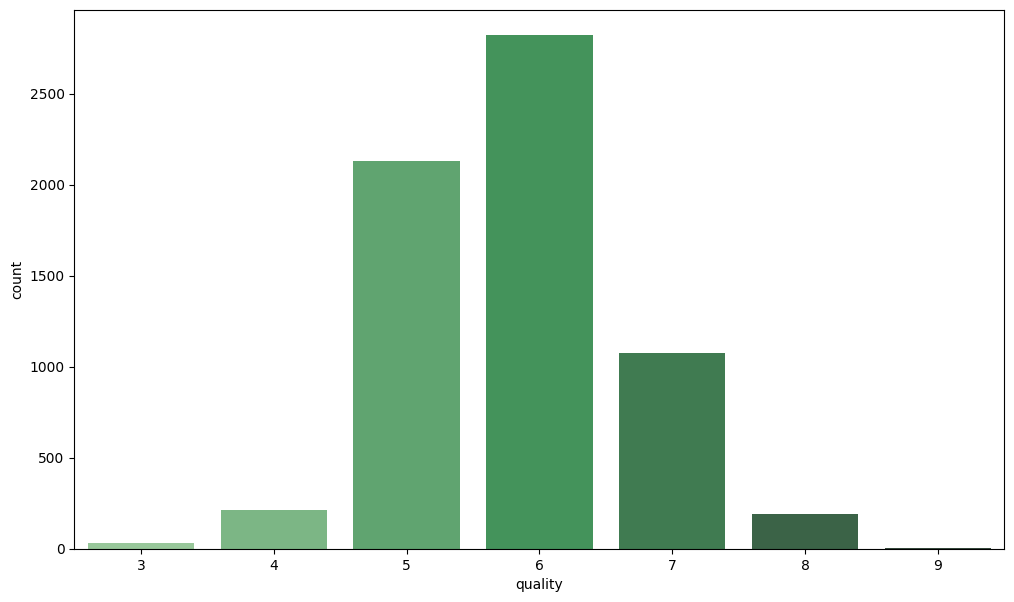

In [5]:
plt.figure(figsize=(12,7))
sns.countplot(x='quality',data=df,palette='Greens_d')
plt.show()

In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


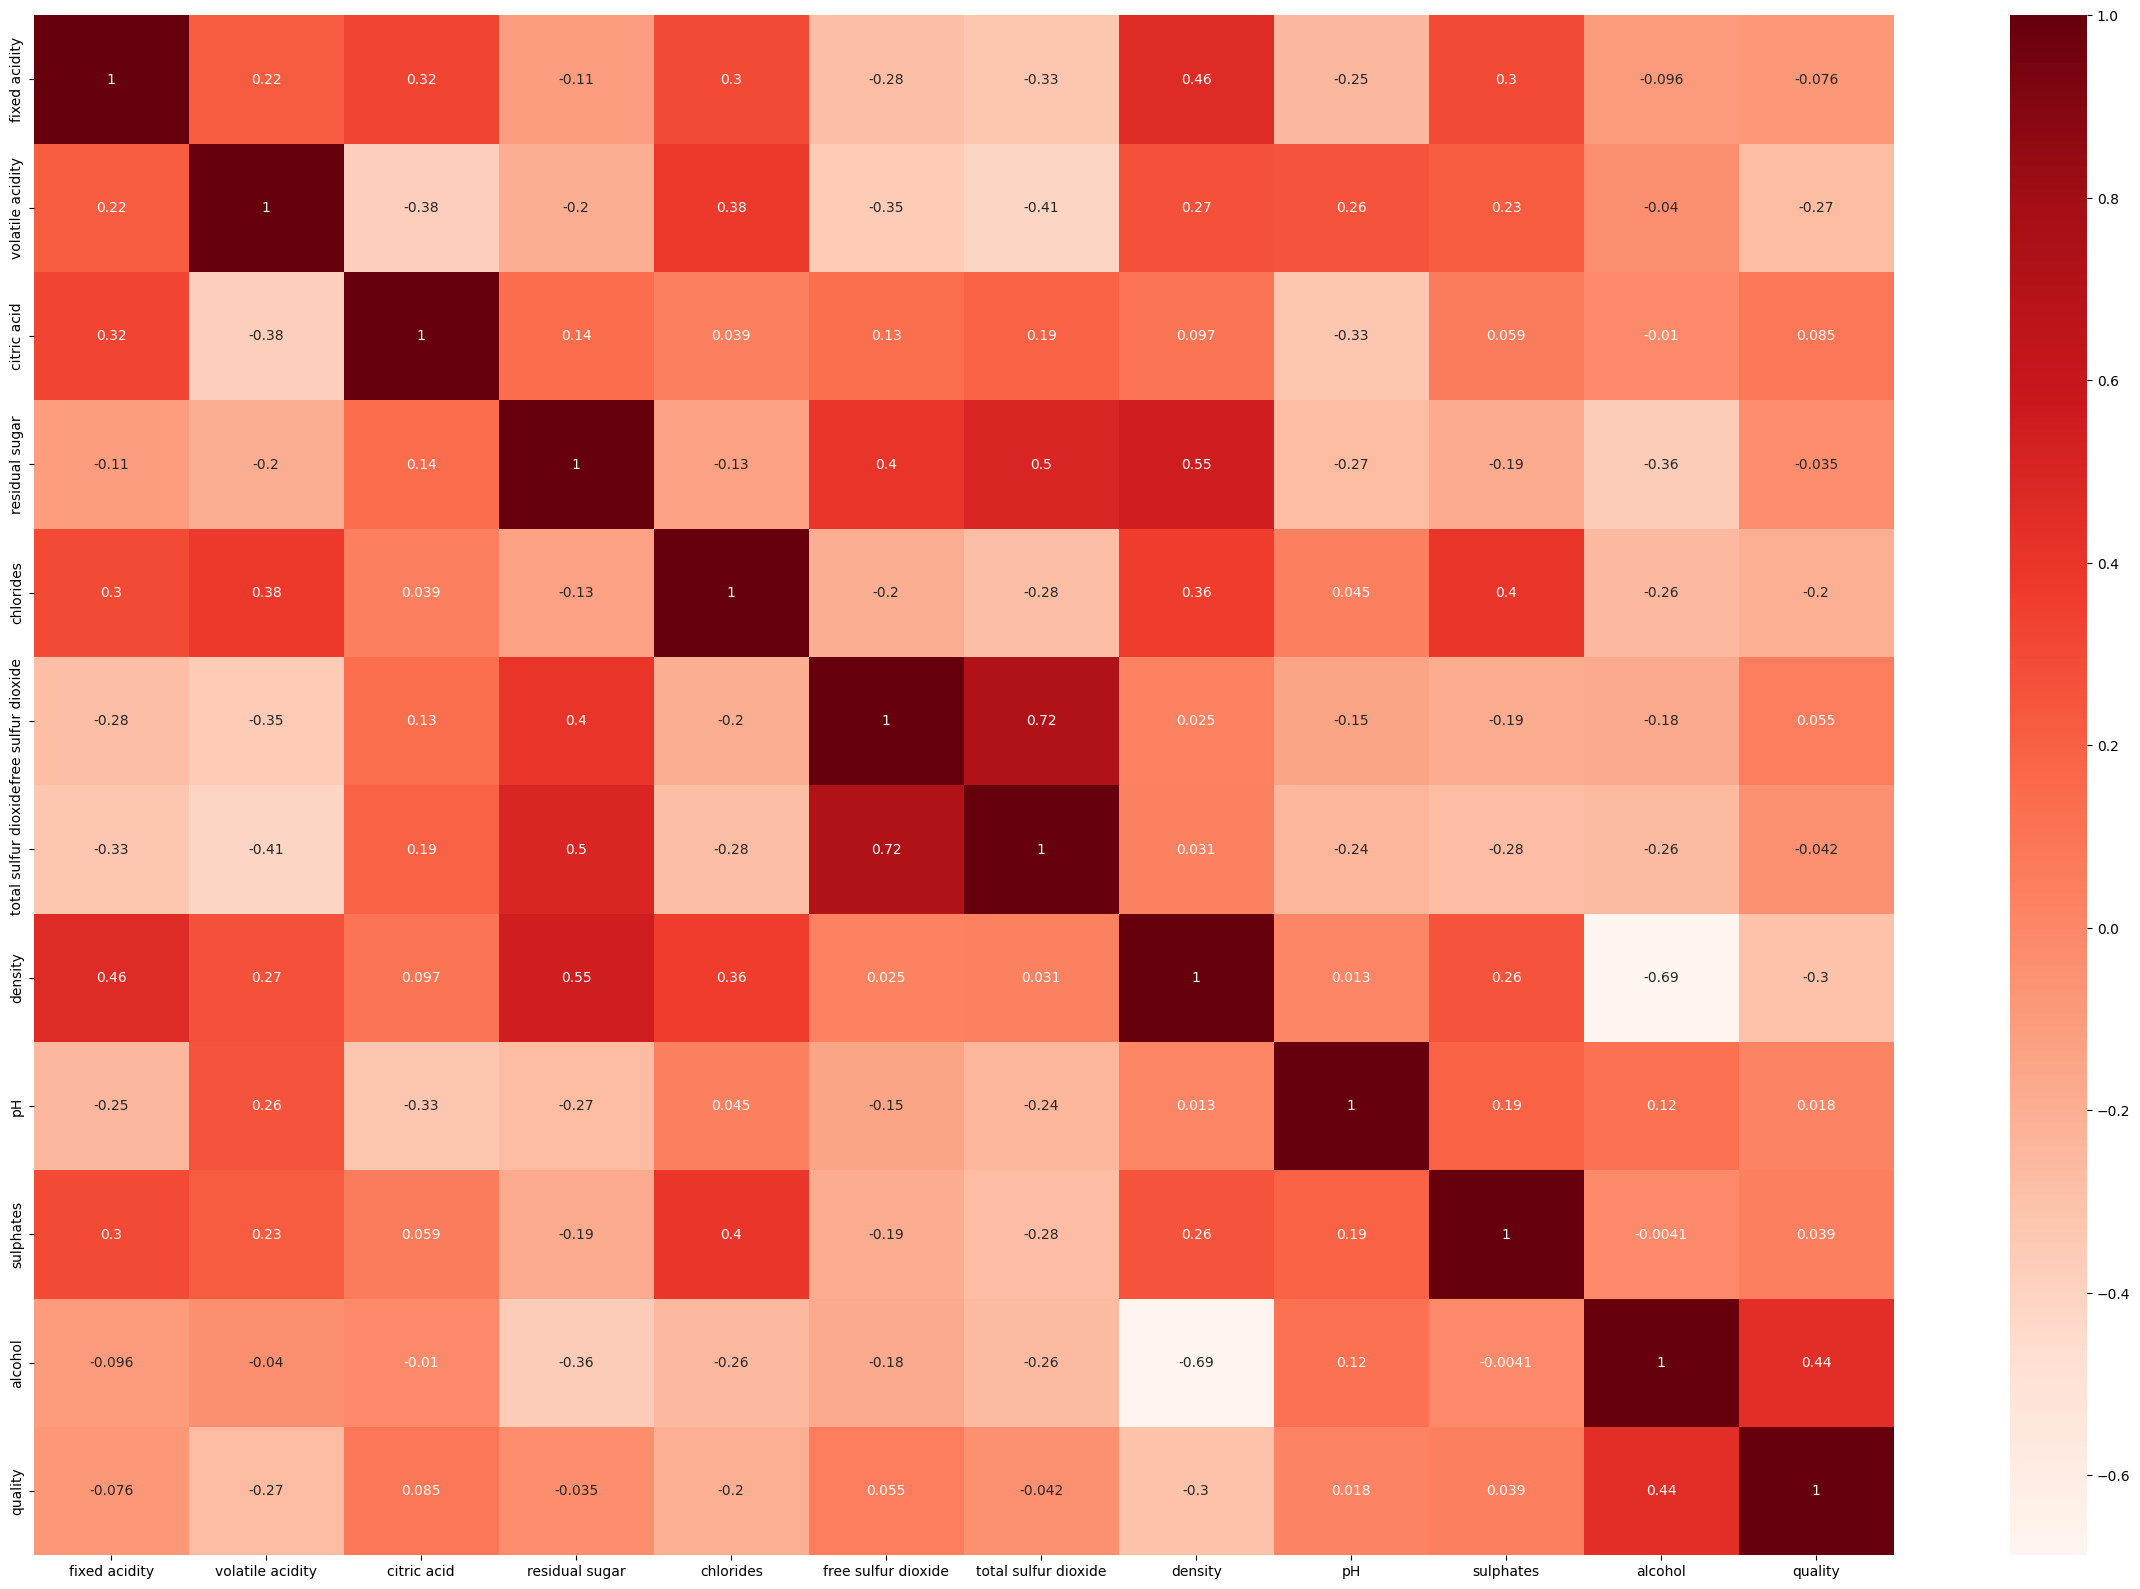

In [7]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

**Plot b/w total sulphur dioxide and free sulphur dioxide**

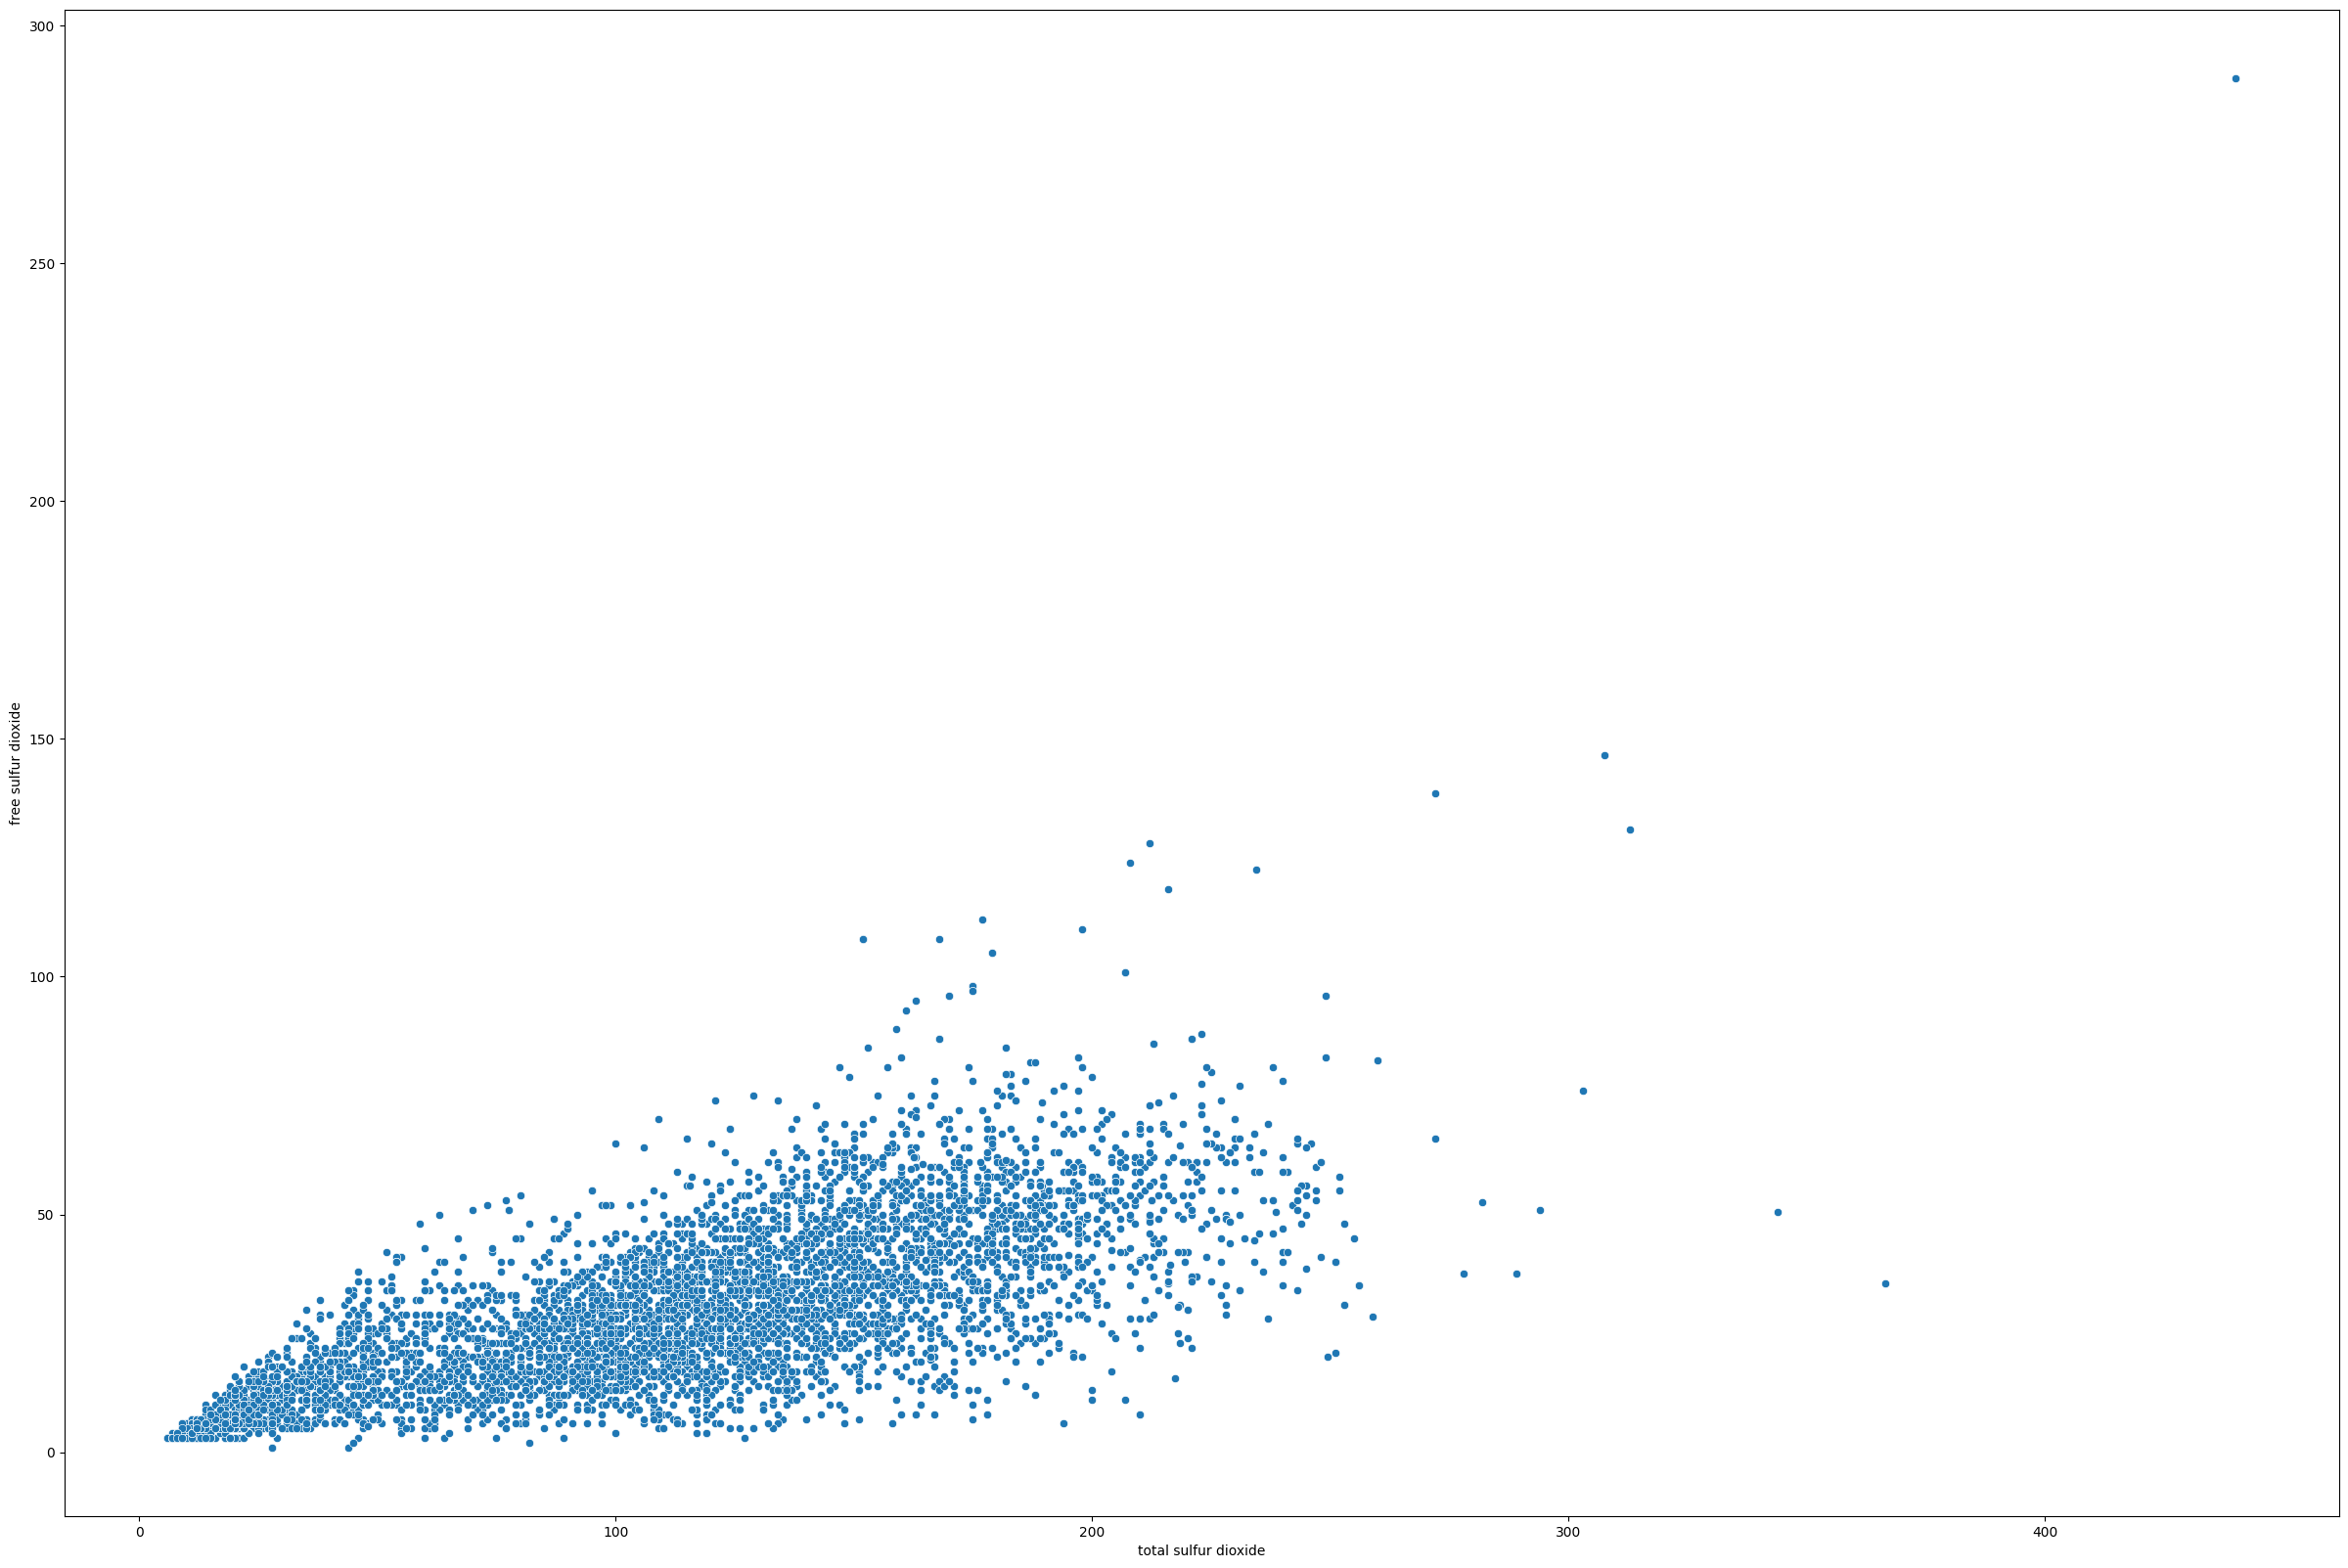

In [8]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

**Quality of wine varies b/w 3-8,and the below plot give information about how the quality changes with respect to volatile acidity**

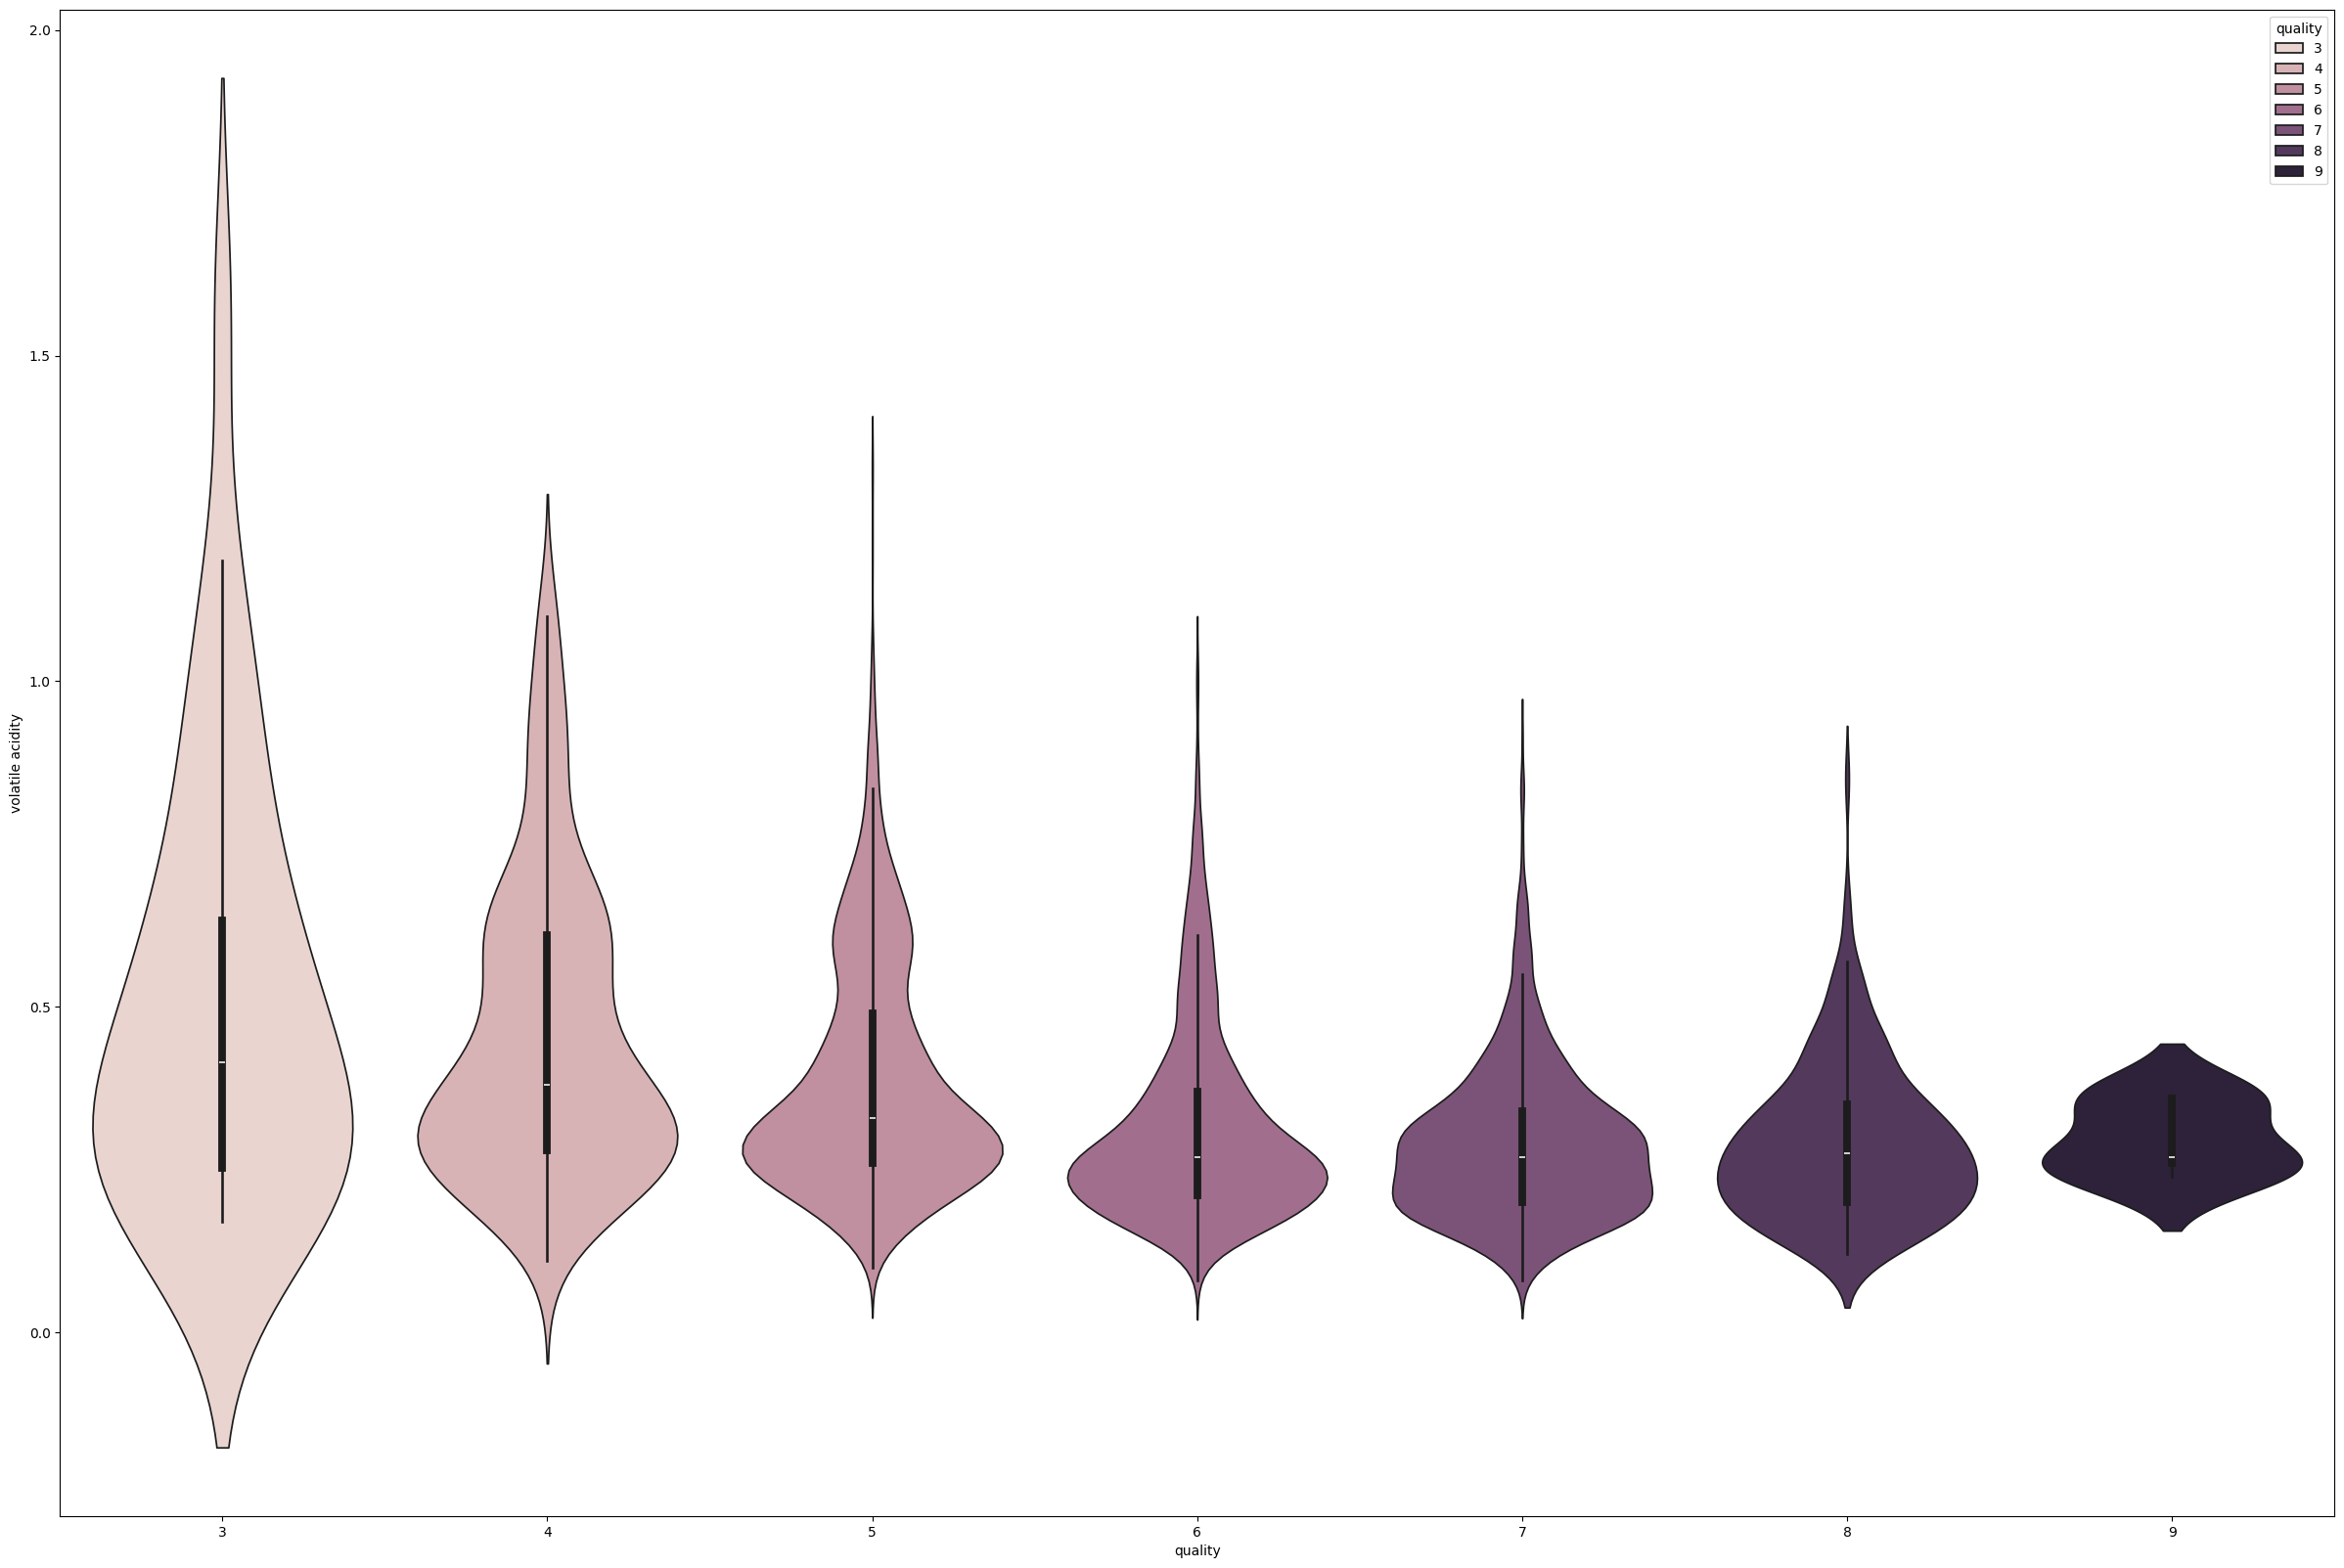

In [9]:
plt.figure(figsize=(30,20))
sns.violinplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

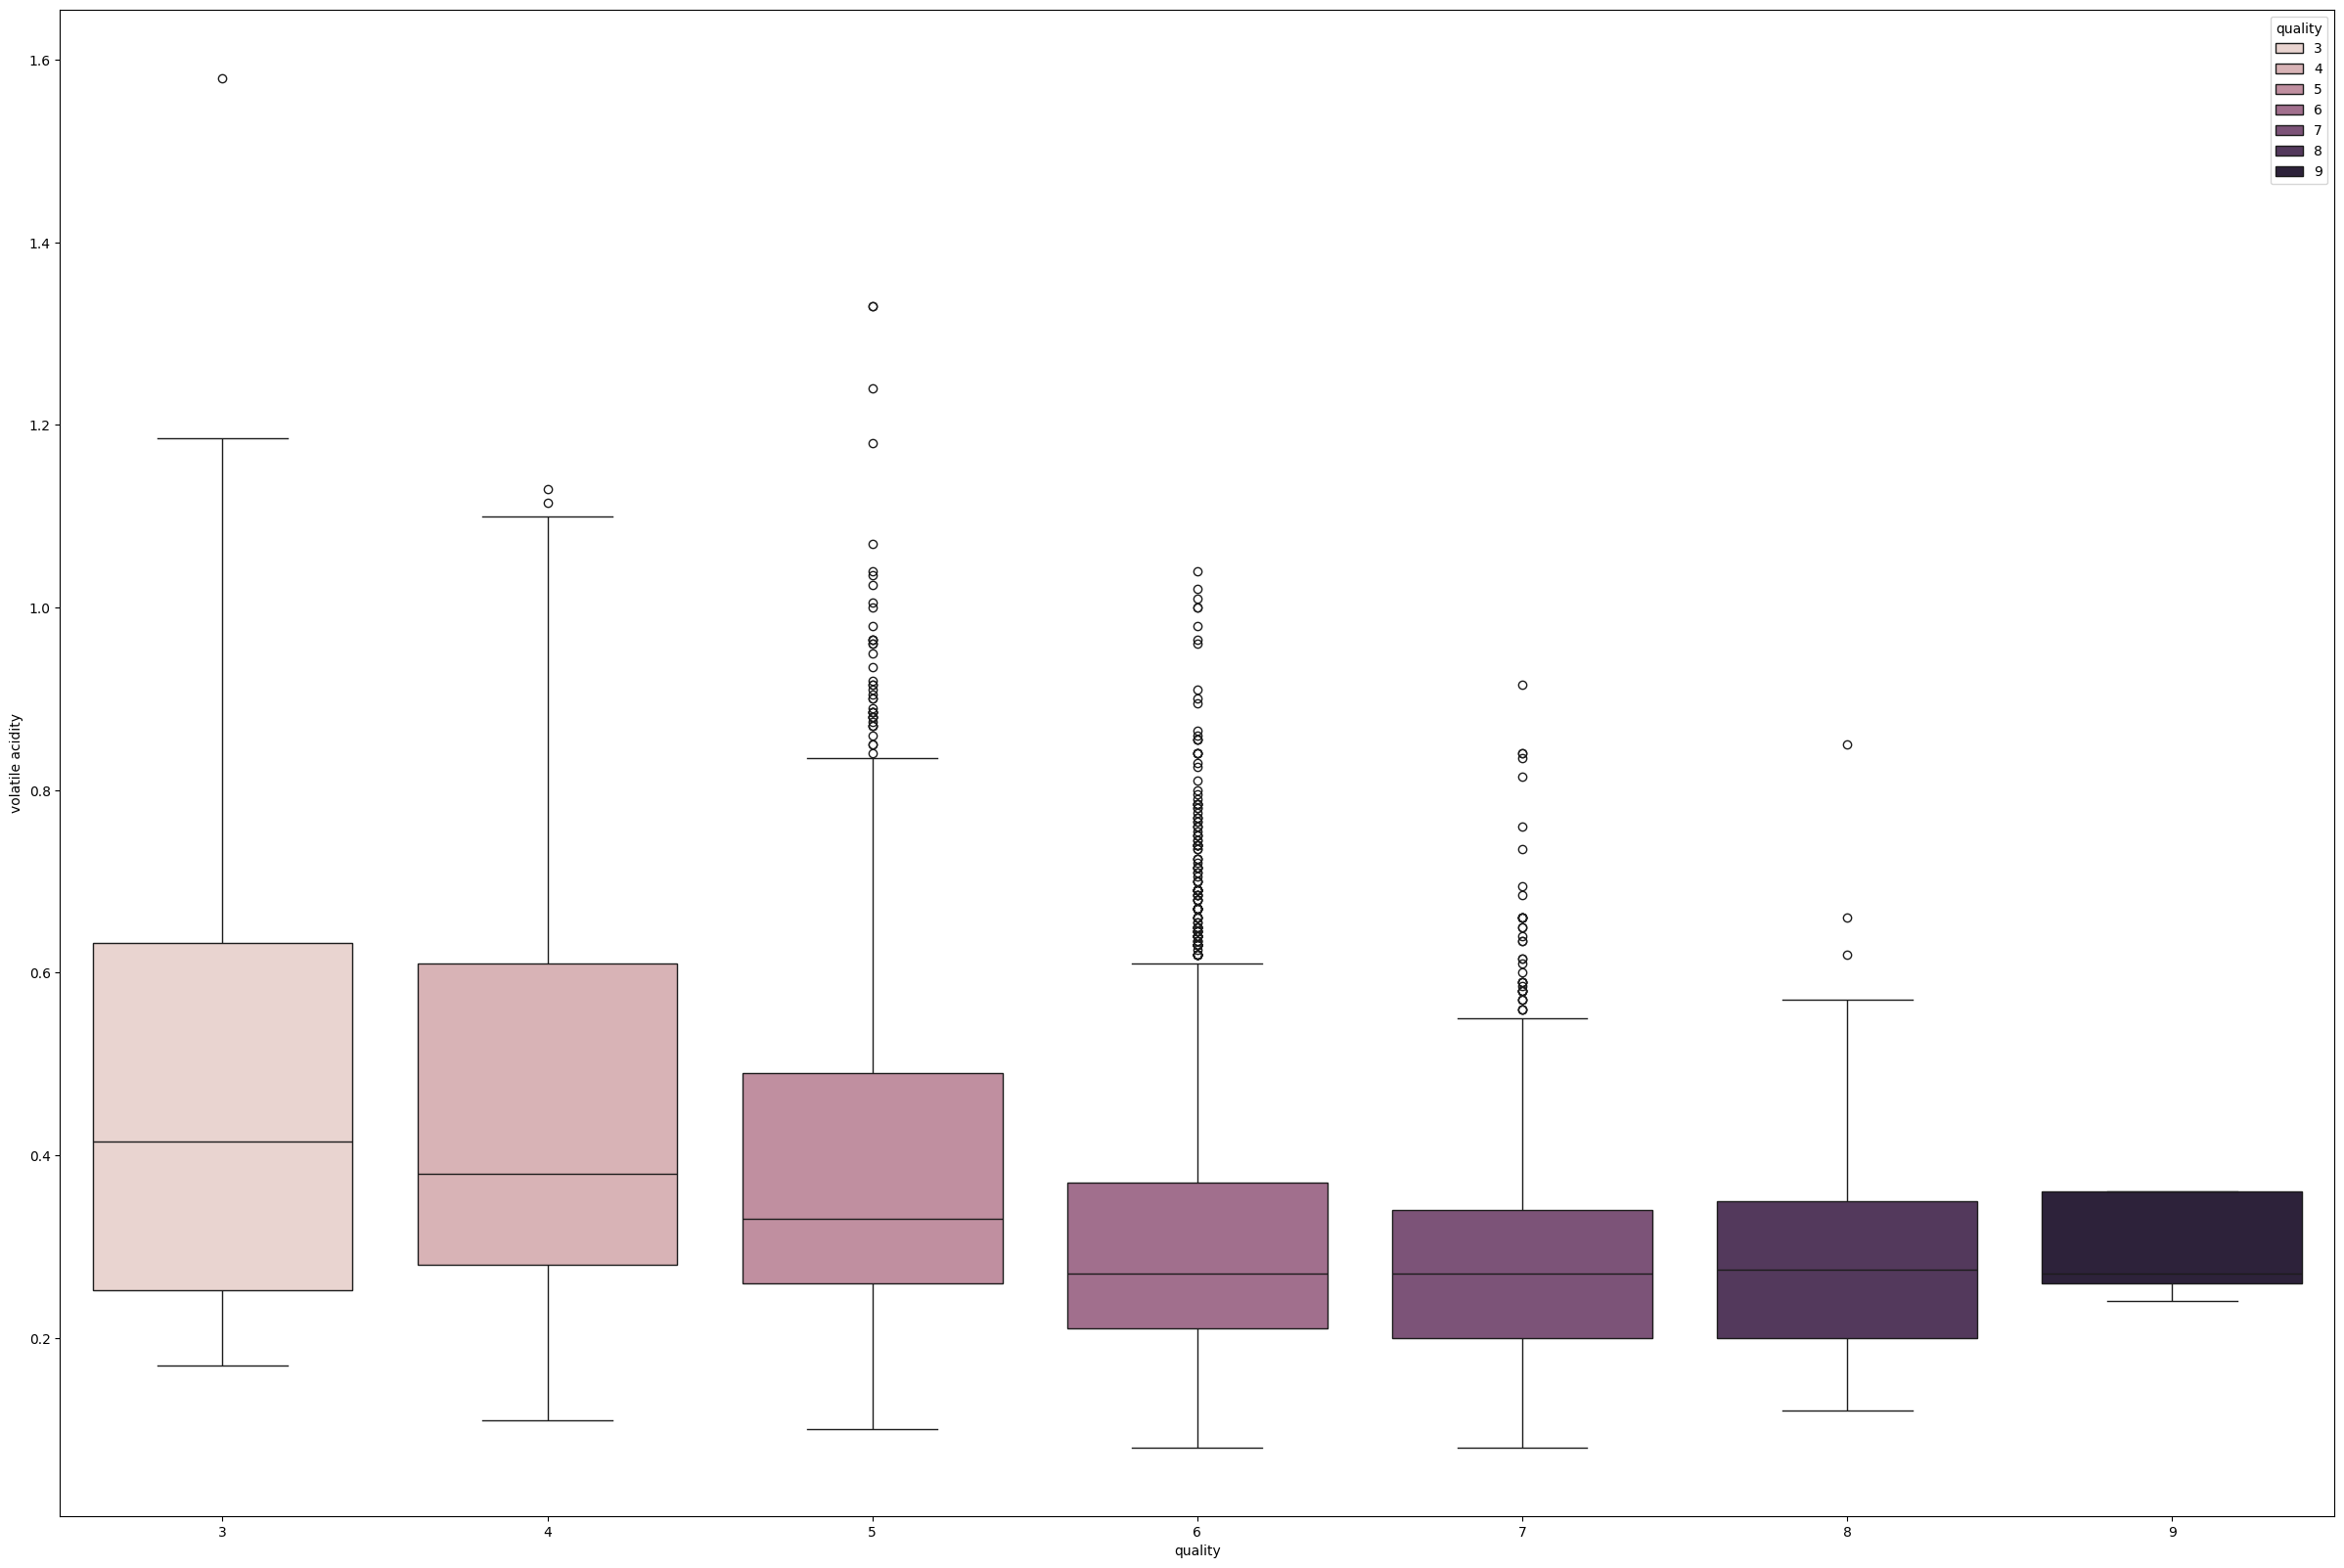

In [10]:
plt.figure(figsize=(30,20))
sns.boxplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

**The below plot explians in detail about how the density of wine varies with the fixed acidity**

<Axes: xlabel='density', ylabel='fixed acidity'>

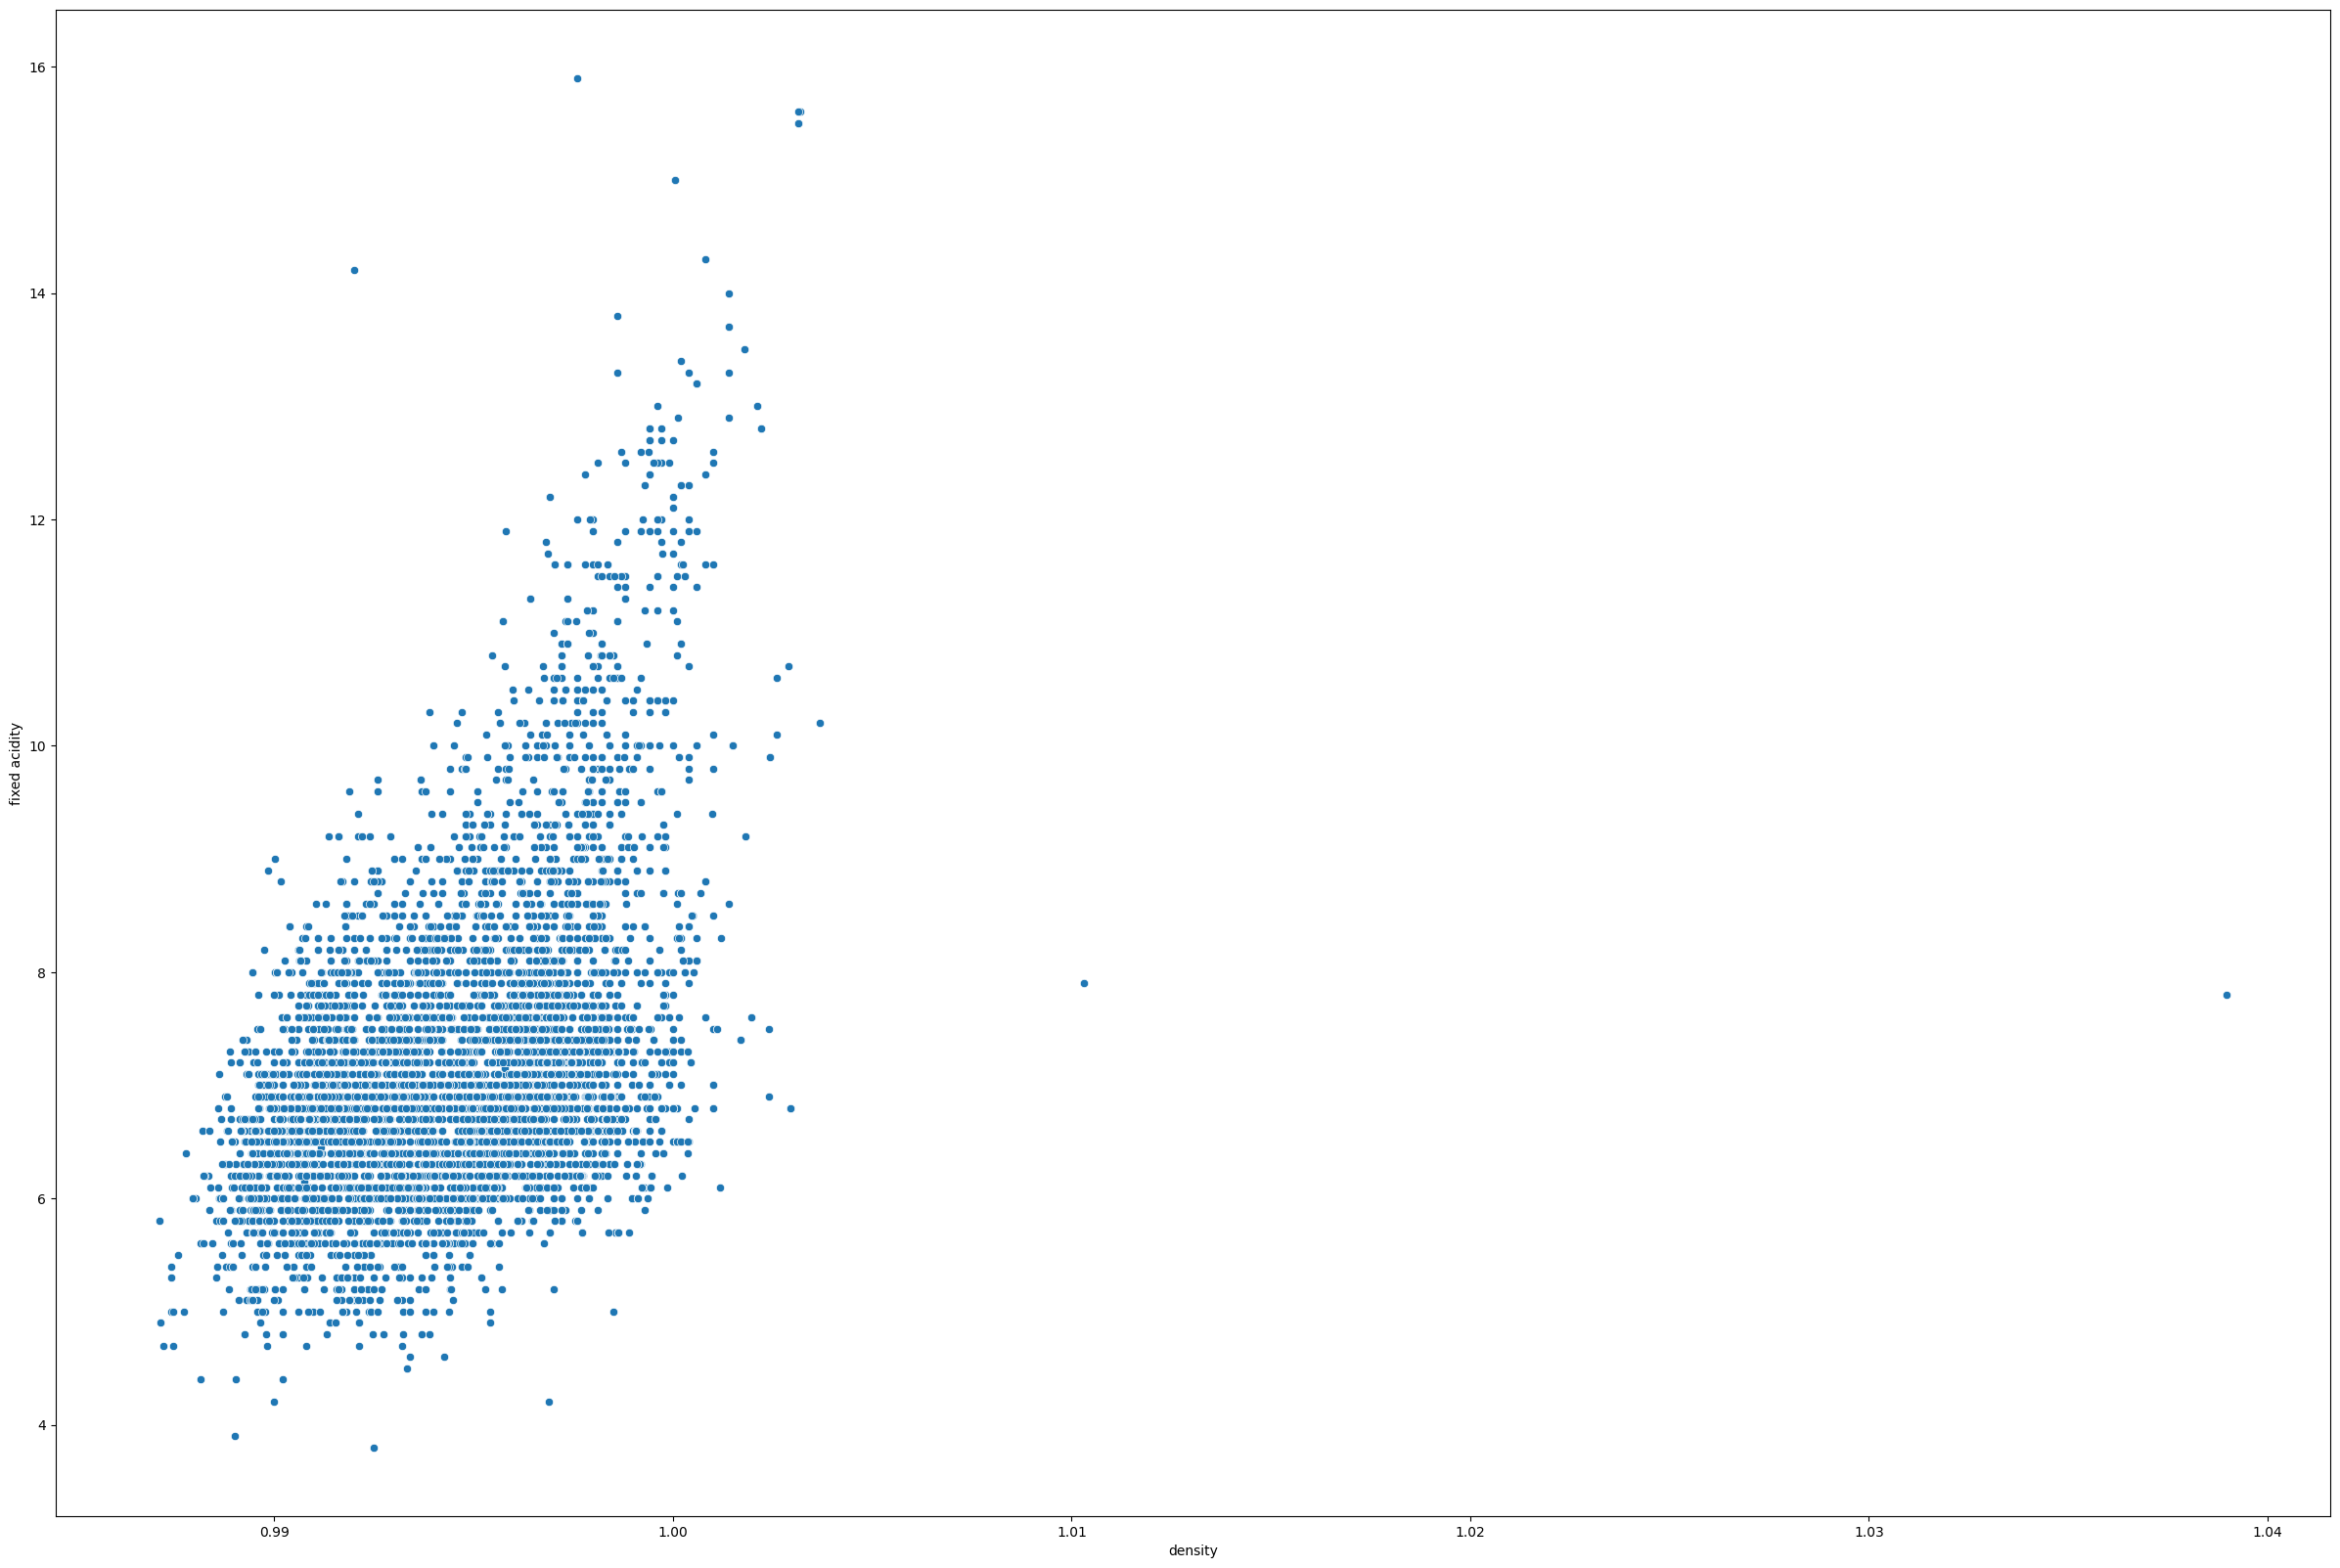

In [11]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='density',y='fixed acidity',data=df)

**The below plot explains about how volatile acidity of wine changes with respect to citric acid**

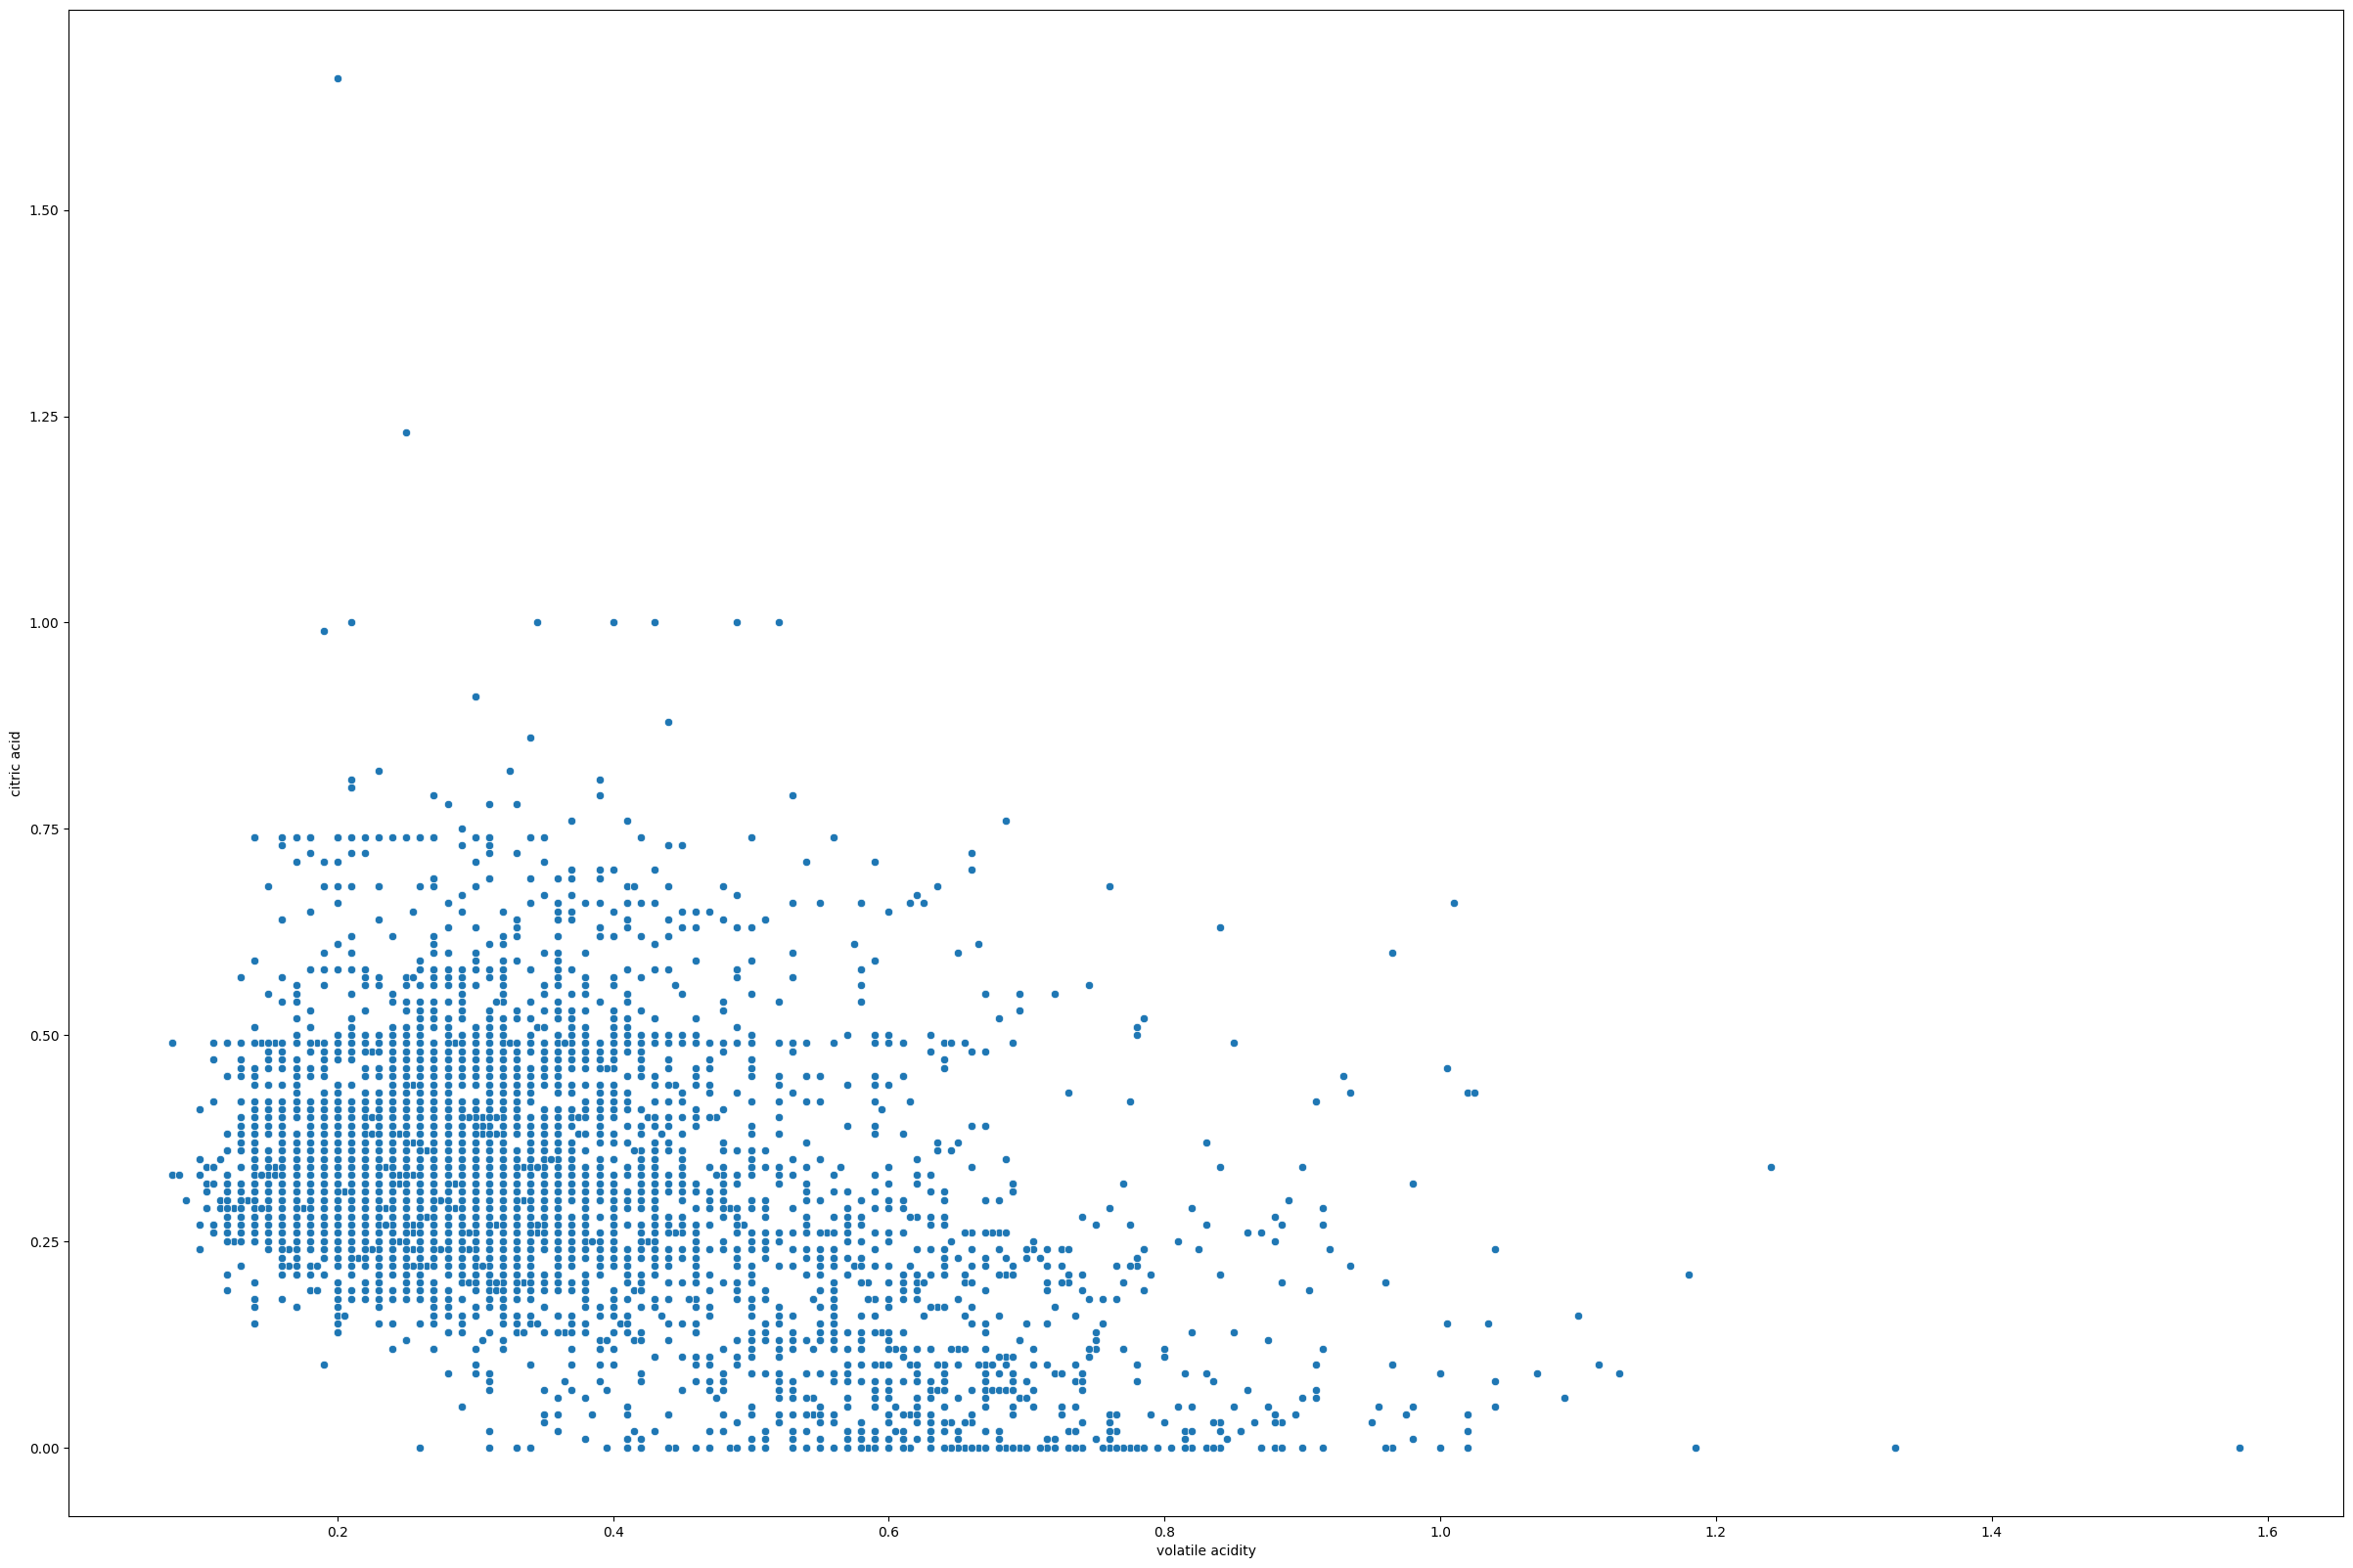

In [12]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

**The below plot explains how quality of wine varies in according with sulphates in it**

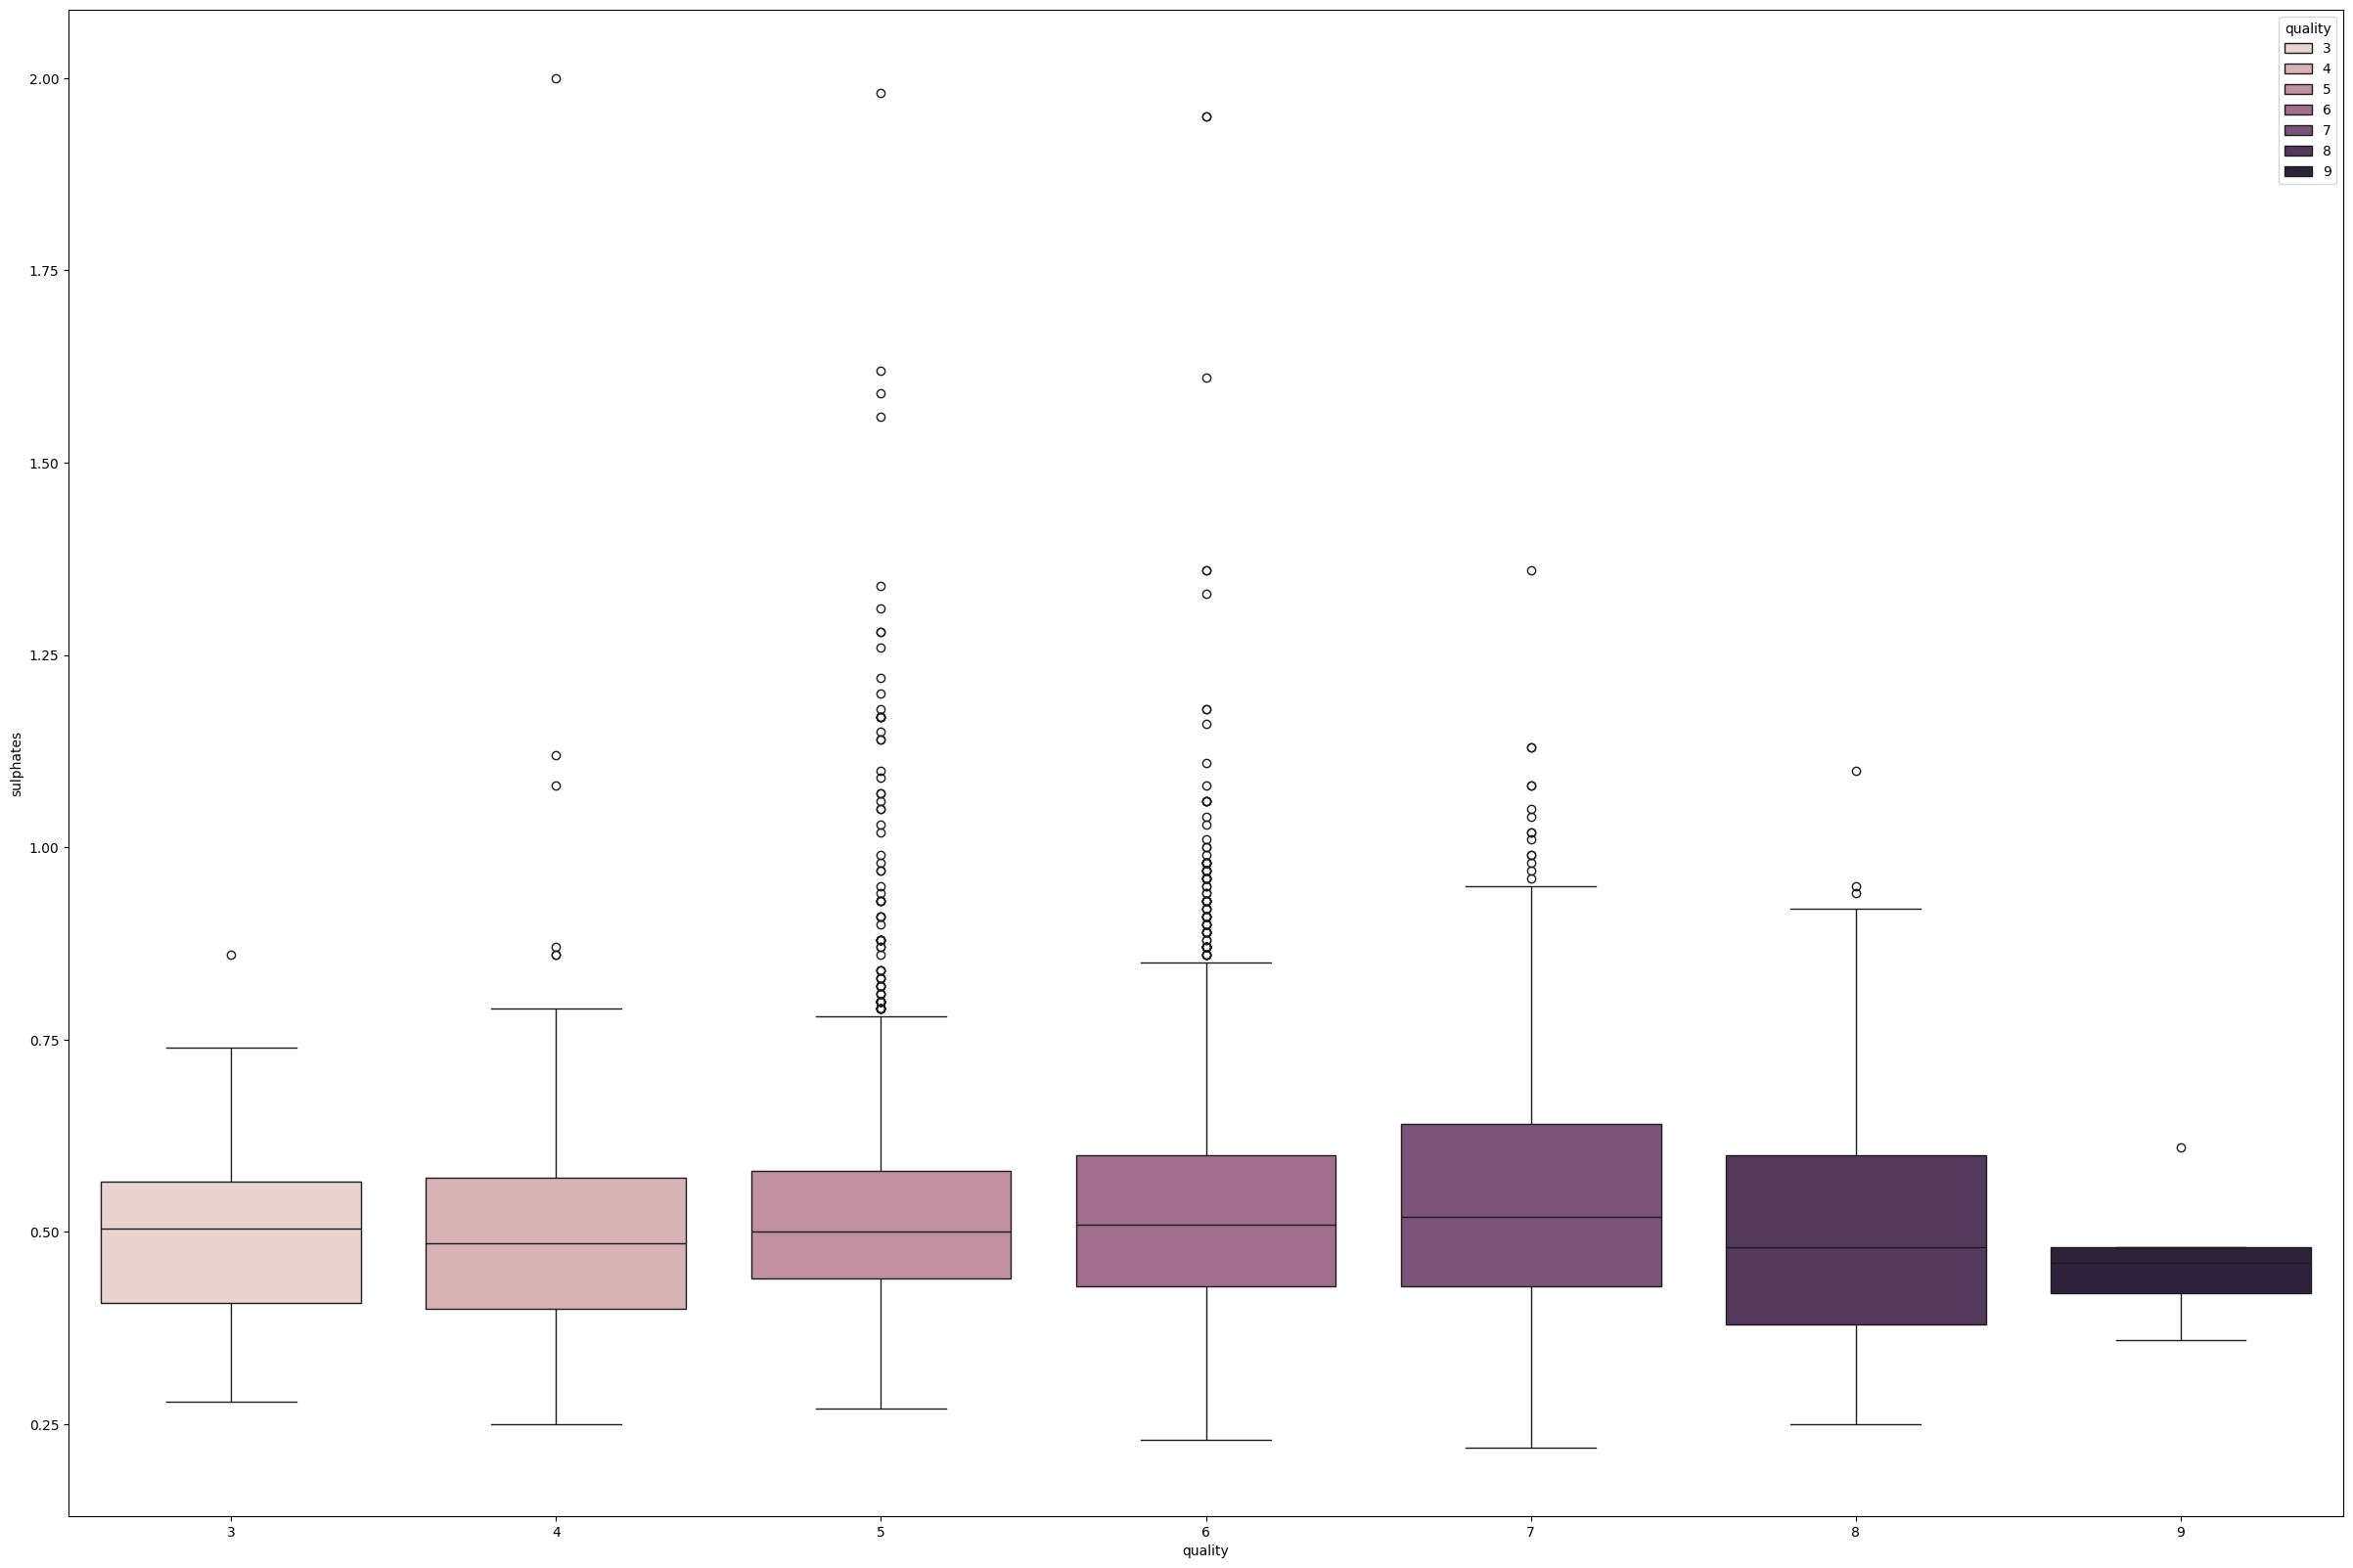

In [13]:
plt.figure(figsize=(30,20))
sns.boxplot(x='quality',y='sulphates',data=df,hue='quality')
plt.show()

**The below plot describes about citric acid and volatile acidity**

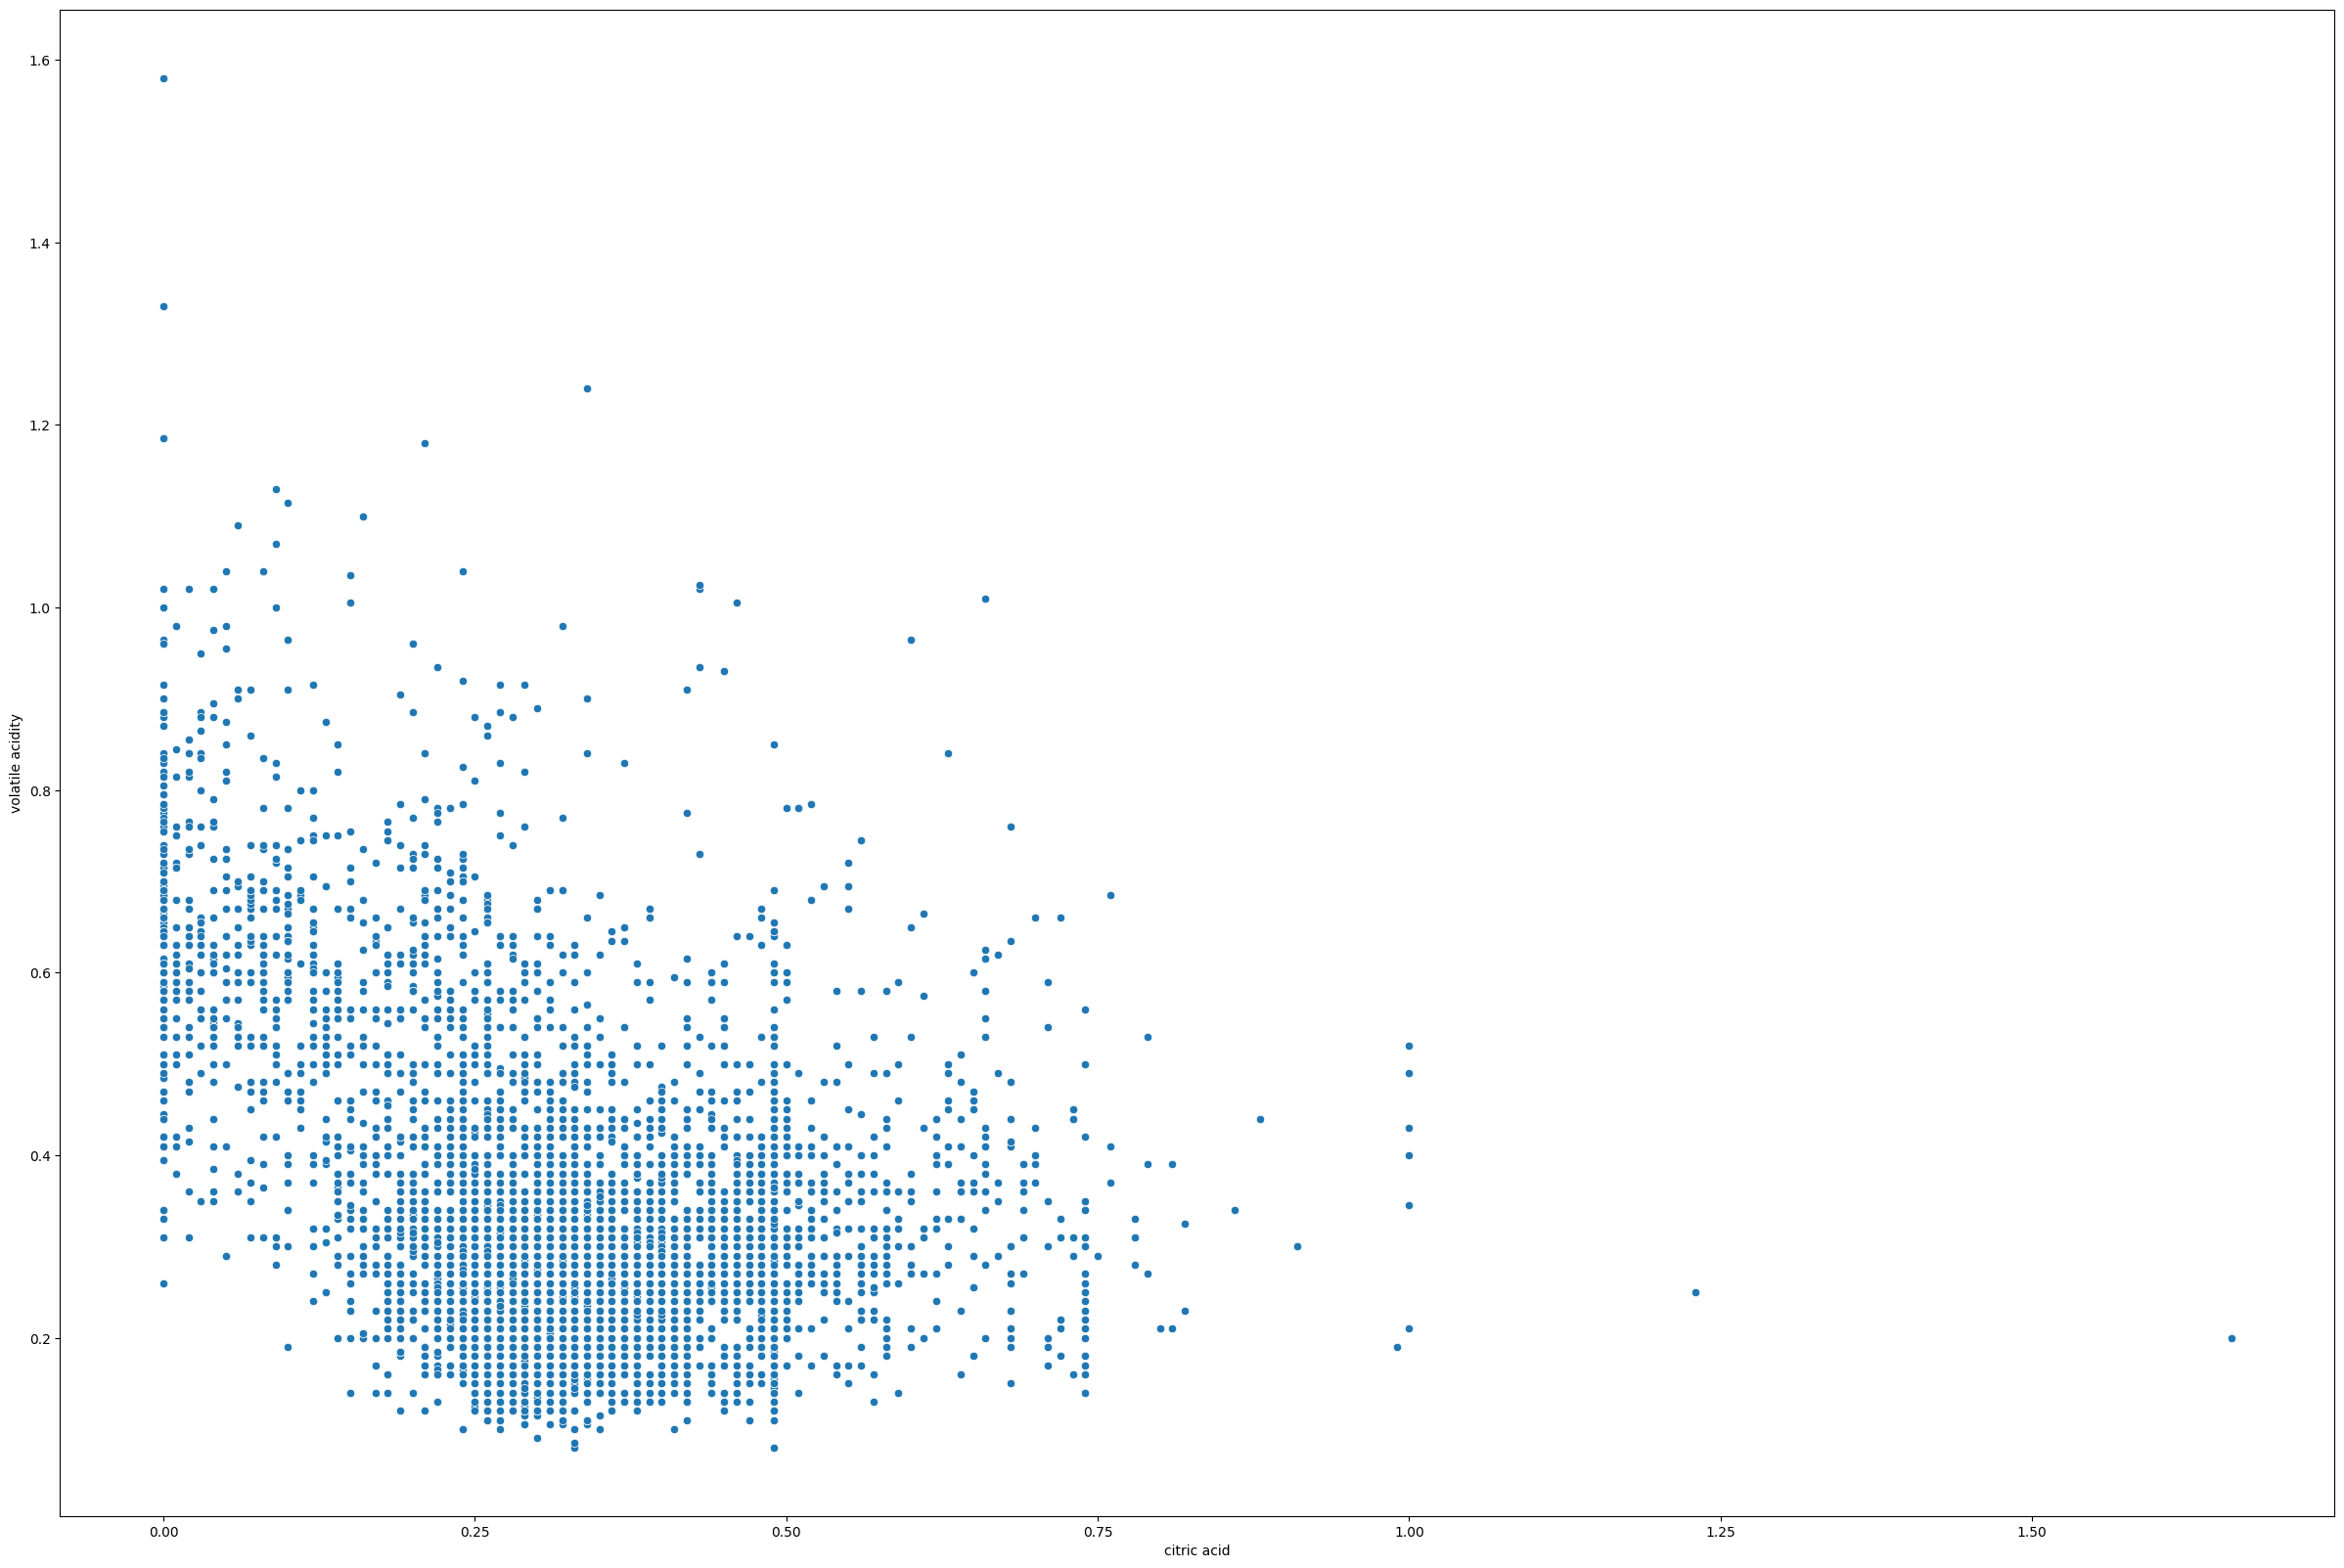

In [14]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

**Data Preprocessing**

In [15]:
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()

**Splitting the dataset as 20% for testing and 80% for training**

In [16]:
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.1,random_state=0)

**Preparing for Models**

In [17]:
model_comp={}

**1.Logistic Regression**

In [25]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.5502318392581144
0.4978043677569078
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.57      0.59      0.58       202
           6       0.54      0.75      0.63       309
           7       0.46      0.06      0.11       101
           8       0.00      0.00      0.00        12

    accuracy                           0.55       647
   macro avg       0.26      0.23      0.22       647
weighted avg       0.51      0.55      0.50       647



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

**2. Decision Tree**

In [26]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.58887171561051
0.5913914955434374
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.23      0.29      0.26        21
           5       0.62      0.63      0.63       202
           6       0.65      0.60      0.63       309
           7       0.50      0.58      0.54       101
           8       0.23      0.25      0.24        12

    accuracy                           0.59       647
   macro avg       0.37      0.39      0.38       647
weighted avg       0.60      0.59      0.59       647



**3.Random Forest**

In [27]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.723338485316847
0.7128277264844488
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.75      0.14      0.24        21
           5       0.71      0.75      0.73       202
           6       0.73      0.80      0.76       309
           7       0.73      0.61      0.67       101
           8       1.00      0.33      0.50        12

    accuracy                           0.72       647
   macro avg       0.65      0.44      0.48       647
weighted avg       0.73      0.72      0.71       647



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**4.KNN**

In [28]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.5826893353941267
0.5723783313388788
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.55      0.67      0.60       202
           6       0.63      0.61      0.62       309
           7       0.57      0.50      0.53       101
           8       0.50      0.25      0.33        12

    accuracy                           0.58       647
   macro avg       0.37      0.34      0.35       647
weighted avg       0.57      0.58      0.57       647



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5.SCV**

In [29]:
s=SVC()
s.fit(xtrain,ytrain)
y5=s.predict(xtest)

print(accuracy_score(ytest,y5))
print(f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(y5,ytest),f1_score(ytest,y5,average='weighted')]

0.5656877897990726
0.4979796098596291
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.59      0.62      0.61       202
           6       0.55      0.78      0.65       309
           7       0.00      0.00      0.00       101
           8       0.00      0.00      0.00        12

    accuracy                           0.57       647
   macro avg       0.19      0.23      0.21       647
weighted avg       0.45      0.57      0.50       647



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model Comparison** (accuracy and f1 scores of all applied models are given below)

In [30]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score
logistic regression,0.550232,0.497804
svc,0.565688,0.497980
KNN,0.582689,0.572378
decision tree,0.588872,0.591391
Random forest,0.723338,0.712828
